<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$ 

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.


## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




**Librerías**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**1. Calculate your series for  x≤1  and compare it to the built-in function exp(x)**

In [ ]:
x = float(input('Escoja un x:\n')) #Se define un x

def serie_e(N):                    #Función que retorna el valor de e^-x
  Nceros = np.zeros(N)             #Se genera un arreglo vacío
  for n in range(N):
    Nceros[n] = ( ((-1)**n)*x**n )/np.math.factorial(n) #Calcula el n-ésimo término y lo mete en la lista que era vacía
  return sum(Nceros)                                    #Suma todos los términos del arreglo (sumatoria)

#CALCULAR QUÉ N ME SIRVE PARA QUE EL SIG TÉRMINO NO SEA MAYOR A 10^-7

print('Miremos un N tal que el siguiente término de la serie no sea más que 10^-7:')
contador = 0

Nsig = abs( ((-x)**(contador+1))/np.math.factorial(contador+1) ) # Fórmula del N+1 término
error = abs((10**-7)*serie_e(contador))                          # Fórmula para que el error sea menor a 10^-7

while Nsig > error:
  contador += 1                                                    #Este es el N que se meterá al final en la serie
  Nsig = abs( ((-x)**(contador+1))/np.math.factorial(contador+1) ) #Se calcula Nsig para el nuevo N
  error = abs((10**-7)*serie_e(contador))                          #Se calcuña error para el nuevo N

print(f'El N escogido para x = {x} es N = {contador}')
print('---------------------------------------')

#CALCULAMOS NUESTRO e Y EL DE NUMPY
e = serie_e(contador)
enumpy = np.exp(-x)

print(f'Con x = {x}')
print(f'El e de la serie es: {e}. y el de numpy: {enumpy}')
print(f'La diferencia entre las dos es de {abs(e-enumpy)}')

Escoja un x:
0.5
Miremos un N tal que el siguiente término de la serie no sea más que 10^-7:
El N escogido para x = 0.5 es N = 8
---------------------------------------
Con x = 0.5
El e de la serie es: 0.6065305679563492. y el de numpy: 0.6065306597126334
La diferencia entre las dos es de 9.175628423729876e-08


**Examine the terms in the series for  x≈10  and observe the significant subtractive cancellations**

near-perfect cancellation at  n≈x−1:
 1342.5873015873017


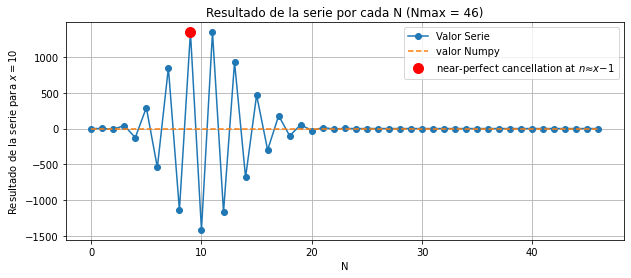

In [ ]:
#Veamos qué da ṕara distintos valores de N

x = 10                  #Definimos x
N = 46                 #Definimos N máx
arreglo = np.zeros(N+1)
e_numpy = np.zeros(N+1)
for i in range(N+1):
  arreglo[i] = serie_e(i)
  e_numpy[i] = np.exp(-x)

print(f'near-perfect cancellation at  n≈x−1:\n {arreglo[9]}')

plt.figure(figsize=(10,4))
plt.title('Resultado de la serie por cada N (Nmax = 46)')
plt.plot( range(N+1),arreglo,'o-', label='Valor Serie')
plt.plot( range(N+1),e_numpy,'--', label='valor Numpy')
plt.plot(9, arreglo[9],'.',markersize=20, color='r',label='near-perfect cancellation at $n≈x−1$')
plt.ylabel('Resultado de la serie para $x=10$')
plt.xlabel('N')
plt.legend()
plt.grid()

**See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values**

near-perfect cancellation at  n≈x−1:
 9.914169866623816e-05


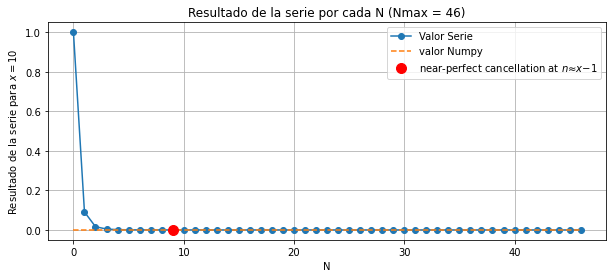

In [ ]:
def convergent_e(N):               #Función que retorna el valor de e^x
  Nceros = np.zeros(N+1)             #Se genera un arreglo vacío
  for n in range(N+1):
    Nceros[n] = (x**n)/np.math.factorial(n) #Calcula el n-ésimo término y lo mete en la lista que era vacía
  return sum(Nceros)

#Veamos qué da para distintos valores de N

x = 10                  #Definimos x
N = 46                 #Definimos N máx
arreglo = np.zeros(N+1)
e_numpy = np.zeros(N+1)
for i in range(N+1):
  arreglo[i] = 1/convergent_e(i)
  e_numpy[i] = np.exp(-x)

print(f'near-perfect cancellation at  n≈x−1:\n {arreglo[9]}')

plt.figure(figsize=(10,4))
plt.title('Resultado de la serie por cada N (Nmax = 46)')
plt.plot( range(N+1),arreglo,'o-', label='Valor Serie')
plt.plot( range(N+1),e_numpy,'--', label='valor Numpy')
plt.plot(9, arreglo[9],'.',markersize=20, color='r',label='near-perfect cancellation at $n≈x−1$')
plt.ylabel('Resultado de la serie para $x=10$')
plt.xlabel('N')
plt.legend()
plt.grid()

**By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges**

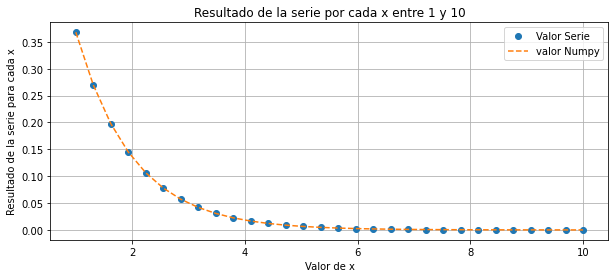

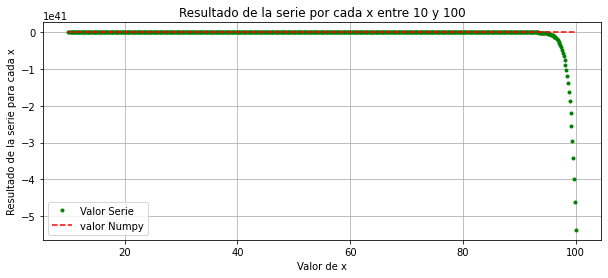

In [ ]:
x1 = np.linspace(1,10,30)    #Arreglo de x para valores de 1 a 10
x2 = np.linspace(10,100,600) #Arreglo de x para valores de 10 a 100
N = 100 #Num máximo de iteraciones

def serie_e(N,x):                    #Función que retorna el valor de e^-x
  Nceros = np.zeros(N)             #Se genera un arreglo vacío
  for n in range(N):
    Nceros[n] = ( ((-1)**n)*x**n )/np.math.factorial(n) #Calcula el n-ésimo término y lo mete en la lista que era vacía
  return sum(Nceros)     

arreglo1 = np.zeros(x1.size)    #Arreglo de ceros para x1
e_numpy1 = np.zeros(x1.size)    #Arreglo de ceros el valor real de e^-x1

for i in range(x1.size):            #Para introducir los valores de x1 otorgados por la serie
  arreglo1[i] = serie_e(N=N,x=x1[i])
  e_numpy1[i] = np.exp(-x1[i])

arreglo2 = np.zeros(x2.size)    #Arreglo de ceros para x2
e_numpy2 = np.zeros(x2.size)    #Arreglo de ceros para el valor real de e^-x2

for i in range(x2.size):            #Para introducir los valores de x2 otorgados por la serie
  arreglo2[i] = serie_e(N=N,x=x2[i])
  e_numpy2[i] = np.exp(-x2[i])

#Gráfica para 1<x<10
plt.figure(figsize=(10,4))
plt.title('Resultado de la serie por cada x entre 1 y 10')
plt.plot( x1 ,arreglo1,'o', label='Valor Serie')
plt.plot( x1 ,e_numpy1,'--' ,label='valor Numpy')
plt.ylabel('Resultado de la serie para cada x')
plt.xlabel('Valor de x')
plt.legend()
plt.grid()

#Gráfica para 10<x100
plt.figure(figsize=(10,4))
plt.title('Resultado de la serie por cada x entre 10 y 100')
plt.plot( x2 ,arreglo2,'o',markersize=3, label='Valor Serie', color='g')
plt.plot( x2 ,e_numpy2,'--' ,label='valor Numpy', color='r')
plt.ylabel('Resultado de la serie para cada x')
plt.xlabel('Valor de x')
plt.legend()
plt.grid()

**Make a series of graphs of the error versus N for different values of x.**

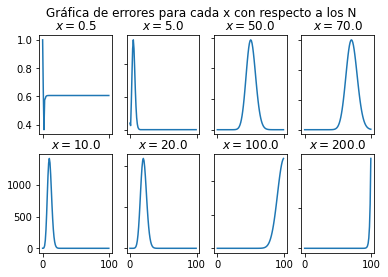

In [ ]:
x = np.array([0.5, 5, 10, 20, 50, 70, 100, 200]) #Definimos distintos valores para x
Nmax = 100  #Definimos un valor máximo para N

def serie_e(N,x):                    #Función que retorna el valor de e^-x
  Nceros = np.zeros(N)             #Se genera un arreglo vacío
  for n in range(N):
    Nceros[n] = ( ((-1)**n)*x**n )/np.math.factorial(n) #Calcula el n-ésimo término y lo mete en la lista que era vacía
  return sum(Nceros)     

def cadaN(N,x):         #Función que retorna un arreglo con la solución para valores de 0 hasta N
  arreglo = np.zeros(N)
  e_numpy = np.zeros(N)
  for i in range(N):
    arreglo[i] = serie_e(i,x)
    e_numpy[i] = np.exp(-i)     #Esto retorna el valor real e e^-x

  return arreglo, e_numpy

def error(N,x):                               #Función que retorna un arreglo para el error que se tiene con cada N y cada x
  error = abs(cadaN(N,x)[0]-cadaN(N,x)[1])
  return error

#GRÁFICA
fig, axs = plt.subplots(2, 4)
fig.suptitle('Gráfica de errores para cada x con respecto a los N')

axs[0, 0].plot(range(N), error(N=N,x=x[0])) #0
axs[0, 0].set_title(f'$x={x[0]}$')
axs[0, 1].plot(range(N), error(N=N,x=x[1])) #1
axs[0, 1].set_title(f'$x={x[1]}$')
axs[1, 0].plot(range(N), error(N=N,x=x[2])) #2
axs[1, 0].set_title(f'$x={x[2]}$')
axs[1, 1].plot(range(N), error(N=N,x=x[3])) #3
axs[1, 1].set_title(f'$x={x[3]}$')
axs[0, 2].plot(range(N), error(N=N,x=x[4])) #4
axs[0, 2].set_title(f'$x={x[4]}$')
axs[0, 3].plot(range(N), error(N=N,x=x[5])) #5
axs[0, 3].set_title(f'$x={x[5]}$')
axs[1, 2].plot(range(N), error(N=N,x=x[6])) #6
axs[1, 2].set_title(f'$x={x[6]}$')
axs[1, 3].plot(range(N), error(N=N,x=x[7])) #7
axs[1, 3].set_title(f'$x={x[7]}$')

for ax in fig.get_axes():
    ax.label_outer()

**Escribir un programa que realice el cálculo de  S(1)N ,  S(2)N  y  S(3)N**

**Estudiar la convergencia de la serie para los tres casos.**

In [ ]:
N = 10000000

def S1(N):
  arreglo = np.arange(1,N+1)
  suma =( (-1)**arreglo )*(arreglo/(arreglo+1))
  return sum(suma)

def S2(N):
  arreglo = np.arange(1,N+1)
  suma1 = (2*arreglo-1)/(2*arreglo)
  suma2 = (2*arreglo)/(2*arreglo + 1)
  return -sum(suma1)+sum(suma2)

def S3(N):
  arreglo = np.arange(1,N+1)
  suma = 1/(2*arreglo*(2*arreglo+1))
  return sum(suma)

print(f'Para N = {N}:')
print(f'S1 = {S1(N)}')
print(f'S2 = {S2(N)}')
print(f'S3 = {S3(N)}')

Para N = 10000000:
S1 = 0.30685276943990136
S2 = 0.3068527951836586
S3 = 0.30685279443980285


0.3068278213149313


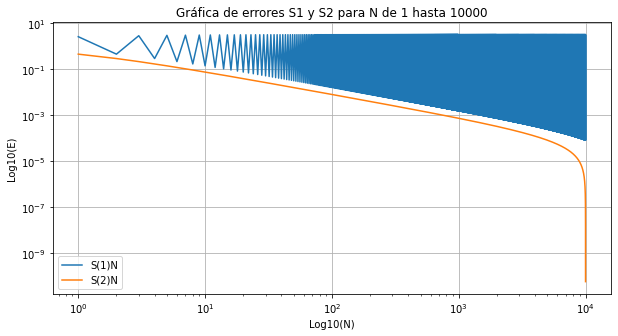

In [ ]:
N = int(10000)

n_values = np.arange(1, N+1)
exact = S3(N)
print(exact)


error_s1 = [np.abs((S1(x) - exact) / exact) for x in n_values]
error_s2 = [np.abs((S2(x) - exact) / exact) for x in n_values]


plt.figure(figsize=(10,5))
plt.title(f'Gráfica de errores S1 y S2 para N de 1 hasta {N}')

plt.loglog(n_values, error_s1,label='S(1)N')
plt.loglog(n_values, error_s2,label='S(2)N')
plt.legend()
plt.xlabel('Log10(N)')
plt.ylabel('Log10(E)')
plt.grid()
plt.show()

# **Análisis**
Aunque esperaba que los errores se amplificaran con el número de iteraciones, en realidad fueron disminuyendo. En la gráfica azul que respresenta el error de S1 sí se ve que la precisión es mala para N impar y disminuye en los N pares.
Para S2 vemos que sí va disminuyendo mucho el error.